## Title: Evaluation Solution

Notebook created to;
- Predict the status of the water pumps using data from Taarifa and the Tanzanian to create a predictive model

## Solution Framework: CRISP-DM Framework

### Contents 
    
[1. Business Understanding](#0_bus_undr): 
- Understand what you want to accomplish from a business perspective

__1.1__    Set objectives 
    
[2. Data Understanding](#data_exp): 

__2.1__    __Load data__ 

__2.2__    __Describe Data__: Gross/Surface properties/summary stats

__2.3__    __Data Quality (Task 3)__
- Verify data quality in terms of Correct data types, Errors, Duplicates, Missing values. 
- Clean Accordingly 

__2.4__   __Merge Data (Task 2)__ 
- Merge features and labels data on id

__2.5__    __Explore Data__:  

__2.5.1__ Data Visulations + Distributions 
- Features
- Target variable
- Features + Target variable 

__2.5.2__ Data Correlations (Task 4)

[Section 3: Data Preparation](#data_prep)

__3.1__    __Format Data for model__
- Construct Categorical Variables (Task 5)

__3.2__    __Feature Selection__: Based on relevance, correlation, quality, technical constraints

__3.3__    __Final Dataset__ (Task 6)

[Section 4: Model Building (Task 7)](#model_build)

__4.1__    Generate Test design: Separate into train & test sets 

__4.2__    Select Modelling Technique: Random Forest/GBM/XGBoost

__4.3__    Hyper-parameter tuning on selected model

__4.4__    Test final model on test set 

[Section 5: Evaluation/Conclusion](#eval)

__5.1__    Conclusions

### Task Directory
[Task 1 : 2.5.1 Data Visulation](#data_visualisations)

[Task 2 : 2.4 Merge Data](#merge)

[Task 3 : 2.3 Data Quality](#qual)

[Task 4 : 2.4 Data Correlations](#corr)

[Task 5 : 2.4 Handing Categorical variables](#construct_categorical)

[Task 6 : 3.3.1 Final Dataset](#final_dataset) 

[Task 7 : Section 4: Model Building ](#model_build)

#### Imports

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier

In [3]:
from sklearn import preprocessing

<a id='bus_undr'></a> 
 
## 1. Business Understanding
The main business objective was;
- Predict the status of the water pumps using data from Taarifa and the Tanzanian to create a predictive model
    - Achieve this using the CRISP-DM framework

<a id='data_exp'></a>
## 2. Data Understanding (& Exploration)

### 2.1 Load Data

In [4]:
#Feature set
file = 'data.csv'
features = pd.read_csv(file, sep=",") 

/app/anaconda3/envs/python352/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Labels
file = 'labels.csv'
labels = pd.read_csv(file, sep=",")

### 2.2 Describe data 
Examine the “gross” or “surface” properties of the acquired data and report on the results.

#### 2.2.1 View data

In [7]:
features.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000,3/14/11,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,3/6/13,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25,2/25/13,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0,1/28/13,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,7/13/11,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
labels.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


#### 2.2.2 Size of data
- The size matters in as far as;
- Do the number of records for the feature set match that of the labels
- Is the data sample large enough for a machine learning algorithm to learn on**
- ** maybe notIf we were considering deep learning is there enough data for that?

In [9]:
features.shape

(59401, 40)

In [10]:
labels.shape

(59400, 2)

#### 2.2.4 Summary statistics of data

In [11]:
#Features - Numeric data types
display(features.select_dtypes(include=[np.number]).describe())

,id,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59401.000000,59400.000000,59401.000000,5.940100e+04,59401.000000,59401.000000,59401.000000,59401.000000,59401.00000
mean,37115.697379,668.304949,34.077438,-5.706125e+00,0.474133,15.296914,5.629703,179.901668,1300.66408
std,21453.390691,693.111463,6.567377,2.946079e+00,12.236127,17.587272,9.633574,471.480934,951.61674
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,-200.000000,0.00000
25%,18520.000000,0.000000,33.090347,-8.541109e+00,0.000000,5.000000,2.000000,0.000000,0.00000
50%,37062.000000,369.000000,34.908668,-5.021698e+00,0.000000,12.000000,3.000000,25.000000,1986.00000
75%,55658.000000,1319.250000,37.178350,-3.326164e+00,0.000000,17.000000,5.000000,215.000000,2004.00000
max,74247.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.00000


In [12]:
#Features - Non-Numeric data types
display(features.select_dtypes(include=[np.object]).describe())

,amount_tsh,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59401.0,59401,55766,55746,59401,59401,59030,59401,59401,59401,...,59401,59401,59401,59401,59401,59401,59401,59401,59401,59401
unique,164.0,356,1897,2145,37400,10,19287,21,125,2092,...,8,8,6,5,5,10,8,3,7,6
top,0.0,3/15/11,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,30177.0,572,9084,17402,3563,10247,508,5294,2503,307,...,25347,50819,50819,33186,33186,17022,17022,45795,28523,34626


In [13]:
#Labels - Non-Numeric data types
display(labels.select_dtypes(include=[np.object]).describe())

,id,status_group
count,59400,59400
unique,59399,4
top,7464,functional
freq,2,32259


<a id='qual'></a>
### 2.3 Verify Data Quality & Clean Accordingly  (Task 3)
- Correct data types, Errors, Duplicates, Missing values 

#### 2.3.1 Duplicate records

In [14]:
def check_drop_dups(df):
    '''
    Drop duplicate rows from the dataframe. Print shape before and after to show if there were any duplicates
    
    Parameters:
    df: dataframe
    
    Returns
    df: dataframe with any duplicates dropped
    '''
    
    #Print shape before
    print('Shape before drop duplicates = {}'.format(df.shape))
    #Drop duplicates
    df = df.drop_duplicates()
    #Print shape after
    print('Shape after drop duplicates = {}'.format(df.shape))
    
    return df

In [15]:
#Apply on features set
features = check_drop_dups(features)

Shape before drop duplicates = (59401, 40)
Shape after drop duplicates = (59401, 40)


In [16]:
#Apply on labels
labels = check_drop_dups(labels)

Shape before drop duplicates = (59400, 2)
Shape after drop duplicates = (59399, 2)


#### 2.3.2 Data types 
- Inspect data types and verify they are of the expected type
- Check whether __id__ column (column for joining features and labels) is of the same type

In [17]:
features.dtypes

id                         int64
amount_tsh                object
date_recorded             object
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [18]:
labels.dtypes

id              object
status_group    object
dtype: object

__Note__: __id__ of type __int64__ in features dataset and type __object__ in labels dataset

#### Handling of datatypes (infer type)

- Convert amount_tsh from object to numeric

In [19]:
col = 'amount_tsh'
features = (features.drop(col, axis=1)
         .join(features[col].apply(pd.to_numeric, errors='coerce')))

In [20]:
features[col].dtypes

dtype('float64')

#### Handling of different datatypes (and Corrupt Values)

- Handling of the different datatypes and corrupt values in the features and labels datasets 
- The __id__ column, the column for joining features and label, needed to be of the same type to join the two dataframes
- As seen above __id__ was of type __int64__ in the features set and of type __object_ in the labels set
- However When an attempt was made to convert the id from an object to an int type, it was discovered that there was a corrupted/non-numeric id.
- As it would not be possible to merge this with the features dataset, this record was dealth with as follows;

    - The 'id' column in the labels dataframe was converted from an object to numeric type with the errors coerced to null values
    - The null id values were then dropped from the id column
    

In [21]:
labels.dtypes

id              object
status_group    object
dtype: object

In [22]:
#Convert id column to type numeric (non-numeric values are coerced to null values)
col = 'id'
labels = (labels.drop(col, axis=1)
         .join(labels[col].apply(pd.to_numeric, errors='coerce')))

In [23]:
#Check id is now of type numeric
labels.dtypes

status_group     object
id              float64
dtype: object

#### 2.3.3 Errors in records/levels of the features
- Inspect levels of categorical values for errors & corrupted data
- Replace errors/corrupted values 

In [24]:
def inspect_value_counts_categorical(df):
    '''
    Inspect value counts of categorical
    '''
    #1. Value counts of features with gt than 30 levels 
    print('Features with less than 30 levels')
    for idx, col in enumerate(df.select_dtypes(include=[np.object, np.bool]).keys()):
        #Value counts of Features with less than 30 levels        
        if len(df[col].unique()) < 30:            
            print('Column: {}'.format(col))
            print(df[col].value_counts())
    print('***************')
    
    #2. Value counts of features with gt than 30 levels    
    print('Features with gt than 30 levels')
    for idx, col in enumerate(df.select_dtypes(include=[np.object, np.bool]).keys()):
        if len(df[col].unique()) > 30:            
            print('Column: {}'.format(col))
            #Value counts of Features with gt than 30 levels
            print(df[col].value_counts())


In [25]:
#Apply to Features dataset
inspect_value_counts_categorical(features)

Features with less than 30 levels
Column: basin
Lake Victoria              10247
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5086
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Lake Victoriia                 1
Name: basin, dtype: int64
Column: region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2641
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64
Column: public_meeting
True     51011
False     5055
Name: public_meeting, dtype: int64
Colu

Madukani            508
Shuleni             506
Majengo             502
Kati                373
Mtakuja             262
Sokoni              232
M                   187
Muungano            172
Mbuyuni             164
Mlimani             152
Songambele          147
Miembeni            134
Msikitini           134
1                   132
Kibaoni             114
Kanisani            111
I                   109
Mapinduzi           109
Mjini               108
Mjimwema            108
Mkwajuni            104
Mwenge              102
Azimio               98
Mabatini             98
Mbugani              95
Mission              95
Bwawani              91
Bondeni              90
Chang'Ombe           88
Zahanati             86
                   ... 
Kiku                  1
Masudi                1
Ngashe                1
Samazi                1
Bukini                1
Ihanamilo             1
Liganga               1
Barisii               1
Creta                 1
Mraba                 1
Mwajupi         

In [26]:
inspect_value_counts_categorical(labels)

Features with less than 30 levels
Column: status_group
functional                 32259
non functional             22823
functional needs repair     4316
nonfunctional                  1
Name: status_group, dtype: int64
***************
Features with gt than 30 levels


#### Observations

- Correction 1: The feature '__Basin__' includes the feature level __'Lake Victoria'__ which has 10,247 counts while the feature level __'Lake Victoriia'__ has 1 count. This is assumed to be an error and so 'Lake Victoriia' is replaced with ''Lake Victoria'


- Correction 2: The feature 'source_type' has 1 count for the level 'guinness'. This will be renamed as 'other'


- The __target variable 'status_group'__ includes the class level __'non functional'__ which has 22,822 counts while the class level __'nonfunctional'__ has 1 count. This is assumed to be an error and so 'nonfunctional' is replaced with 'non functional'

#### Solution - Replace values

In [27]:
def replace_record(df, column_name, old_value, new_value):
    '''Replace new value with new value. Print value counts before and after to ensure correct replacement made
    Parameters:
    df: Original dataframe
    column_name: Column in which replacement is being made
    old_value: Old value to be replaced 
    new_value: New value to replace with
    
    Returns
    df: updated dataframe with replacement made 
    '''
    #Value_counts of original
    print(df[column_name].value_counts())
    
    #Replace values
    df = df.replace(old_value, new_value)
    
    print('**************')
    #New value counts
    print('Updated dataframe with replacement made:')
    print(df[column_name].value_counts())
    
    return df

In [28]:
#Correction 1 (Apply replace_record)
column_name = 'basin'
old_value = 'Lake Victoriia'
new_value = 'Lake Victoria'
features = replace_record(features, column_name, old_value, new_value)

Lake Victoria              10247
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5086
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Lake Victoriia                 1
Name: basin, dtype: int64
**************
Updated dataframe with replacement made:
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5086
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


In [29]:
#Correction 2 (Apply replace_record)
column_name = 'source_type'
old_value = 'guinness'
new_value = 'other'
features = replace_record(features, column_name, old_value, new_value)

spring                  17022
shallow well            16823
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
guinness                    1
Name: source_type, dtype: int64
**************
Updated dataframe with replacement made:
spring                  17022
shallow well            16823
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     279
Name: source_type, dtype: int64


In [30]:
#Correction 3 (Apply to target variable)
column_name = 'status_group'
old_value = 'nonfunctional'
new_value = 'non functional'
labels = replace_record(labels, column_name, old_value, new_value)

functional                 32259
non functional             22823
functional needs repair     4316
nonfunctional                  1
Name: status_group, dtype: int64
**************
Updated dataframe with replacement made:
functional                 32259
non functional             22824
functional needs repair     4316
Name: status_group, dtype: int64


#### 2.3.4 Missing Values (Identify)

In [31]:
#Features: Count of null values for each column
features.isnull().sum()

id                           0
date_recorded                0
funder                    3635
gps_height                   1
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3335
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [32]:
#Count of null values for each column
labels.isnull().sum()

status_group    0
id              1
dtype: int64

#### 2.3.6 Clean Missing Data 

#### Missing data - features (Impute)
- Impute numeric values with the mean of the column (Although no numeric columns had null values)
- Impute Boolean values with the mode
- Impute categorical columns with a constant value (null value) as so they don't affect model results

In [33]:
def impute_values(data):
    
    ''' Imputation of missing values
    - Impute missing values of numeric colums with the mean value of the column
    - Impute missing values of categorical colums with the mode of the column

    Parameters:
    data

    Returns:
    data with missing values imputed
    '''
    #1. Numeric values
    # Impute numeric columns with mean
    for idx, col in enumerate(data.select_dtypes(include=[np.number]).keys()):
        data[col].fillna(data[col].mean(), inplace=True)  
    
    #2. Boolean values --> Repalce with mode
    # Impute numeric columns with mean
    for idx, col in enumerate(data.select_dtypes(include=[np.bool]).keys()):
        data[col].fillna(data[col].mode(), inplace=True)          
    
    #3. Categorical/Boolean values
    #Impute with constant value
    for idx, col in enumerate(data.select_dtypes(include=[np.object, np.bool]).keys()):
        data.fillna('null', inplace=True)
        data.replace(0.0, 'null')
        data.replace(0, 'null')
    
    
    return data

In [34]:
##Apply
features = impute_values(features) 

In [35]:
#Re-Inspect Data quality/Null count
features.isnull().sum()

id                       0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

- __Note there are now no missing/null values__

In [36]:
#Re-Inspect whether levels (such as zeros) have been replaced with nan values
inspect_value_counts_categorical(features)

Features with less than 30 levels
Column: basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5086
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64
Column: region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2641
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64
Column: public_meeting
True     51011
False     5055
null      3335
Name: public_meeting, dtype: int64
Column: recorded_by
Ge

#### Missing data - labels (deletion method)
Records with null values in the labels data will be removed as the;
    - __id__ column is needed to join to the features dataset
    - __status_group__ is the target variable and so a null value cannot be used

In [37]:
#Check if any values were coerced to null values
labels.isnull().sum()

status_group    0
id              1
dtype: int64

In [38]:
#Recheck the size BEFORE dropping null values
labels.shape

(59399, 2)

In [39]:
#Remove the null values
labels = labels.dropna()

In [40]:
#Recheck the size AFTER dropping null values
labels.shape

(59398, 2)

In [41]:
#Confirm no null values
labels.isnull().sum()

status_group    0
id              0
dtype: int64

- __Note there are now no missing/null values__

<a id='merge'></a>
### 2.4 Merge Data
- Note that the merge was done here after;
- The size of the features and labels was checked
- The data types were checked 

##### Possible pitfalls
- Column to join on may not be of same type (as accounted for above in 2.3.2)
- May perfrom wrong join (for example a right join instead of a left join)

#### ii. Merge features and labels into one dataset
- A left join will be performed so that we only keep records that have a __target variable__

In [42]:
#Recheck size of features before merging
features.shape

(59401, 40)

In [43]:
#Recheck size of labels before merging
labels.shape

(59398, 2)

In [44]:
#Merge two datasets via a left join
data = labels.merge(features.drop_duplicates(subset=['id']), how='left')

In [45]:
#Reinspect
data.head(3)

,status_group,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh
0,functional,69572.0,3/14/11,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,6000.0
1,functional,8776.0,3/6/13,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.0
2,functional,34310.0,2/25/13,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,25.0


In [46]:
#Verify shape
data.shape

(59398, 41)

- __Verify shape__: The shape is as expected after the join as;

    - Number of rows =  number of records/rows of the labels dataframe. I.e each record has a target variable
    - Number of columns = num_columns_features + num_columns_labels - 1 (Due to overlap of joining id column)

## 2.5 Explore Data

<a id='data_visualisations'></a>
#### 2.3.1 Data Visuaisations 

- Visualise
    - Plot histograms for numeric columns to show frequencies 
    - Plot bar plots for categorical/boolean columns to show group breakdown

In [47]:
def data_vis_numeric(df):
    '''Visulation of features 
    - Plot histograms for numeric columns to show frequencies 
    
    Parameters:
    dataframe of features to visualize 

    Returns:
    Returns no value (displays relevant plots )
    
    '''
    # Plot histograms for numeric columns
    for idx, col in enumerate(df.select_dtypes(include=[np.number]).keys()):
        df[col].plot.hist(title = col)
        plt.show()

In [48]:
print(data_vis_numeric.__doc__)

Visulation of features 
    - Plot histograms for numeric columns to show frequencies 
    
    Parameters:
    dataframe of features to visualize 

    Returns:
    Returns no value (displays relevant plots )
    
    


In [108]:
def data_vis_categorical(df):
    '''Visulation of features 
    - Plot bar plots for categorical/boolean columns to show group breakdown 
    
    Parameters:
    dataframe of features to visualize 

    Returns:
    Returns no value (displays relevant plots )
    
    '''
    # Plot bar plots  for categorical/boolean columns        
    for idx, col in enumerate(df.select_dtypes(include=[np.object, np.bool]).keys()):
        # Only draw bar plots for variables with less than 30 levels
        if len(df[col].unique()) < 30:
            df[col].value_counts().plot.bar(title = col)
            plt.show()

In [51]:
print(data_vis_categorical.__doc__)

Visulation of features 
    - Plot bar plots for categorical/boolean columns to show group breakdown 
    
    Parameters:
    dataframe of features to visualize 

    Returns:
    Returns no value (displays relevant plots )
    
    


#### Plot numeric columns

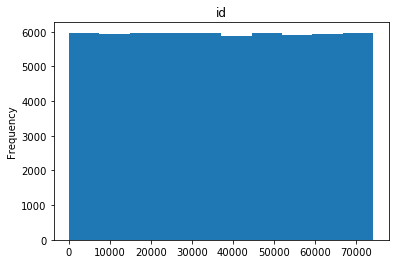

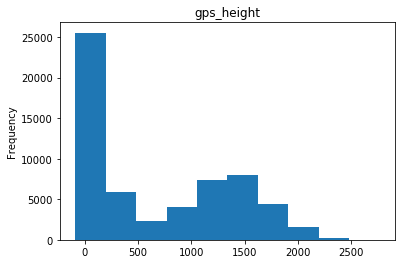

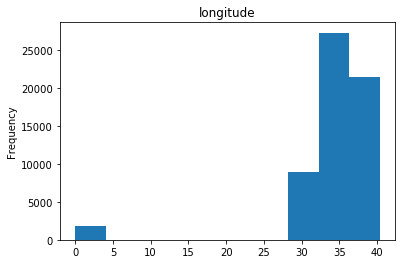

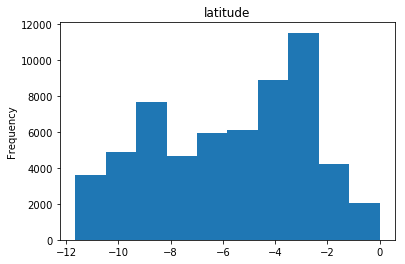

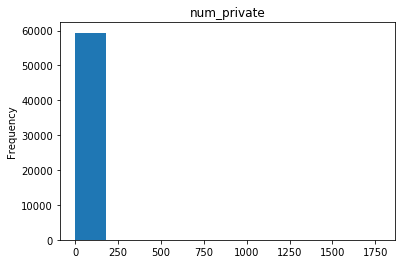

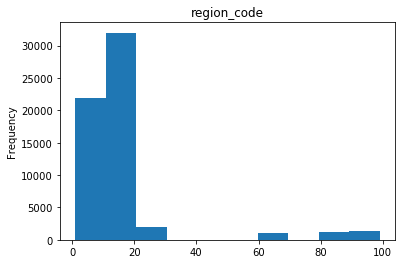

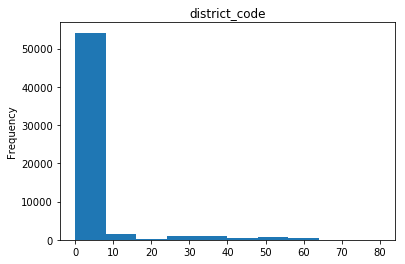

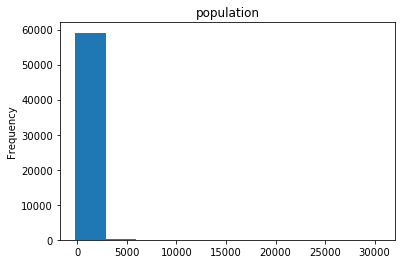

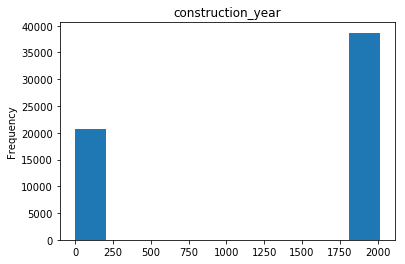

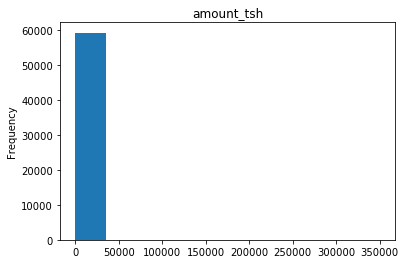

In [52]:
data_vis_numeric(data)

#### Plot categorical columns

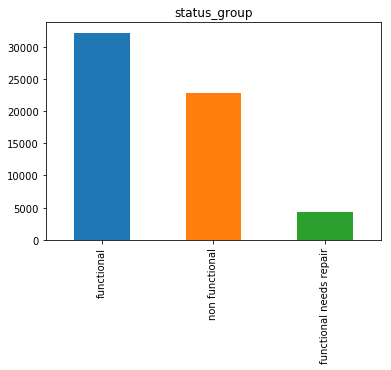

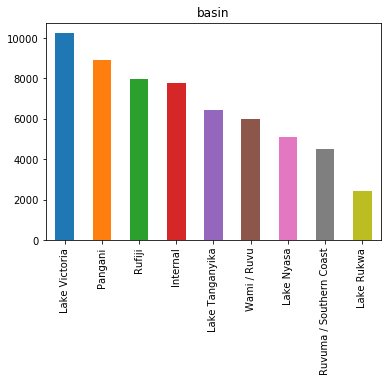

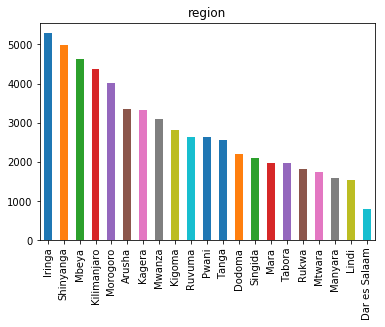

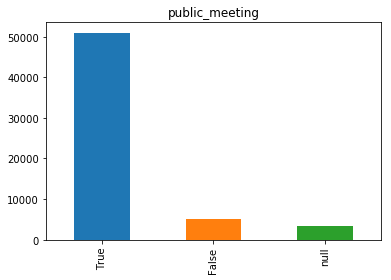

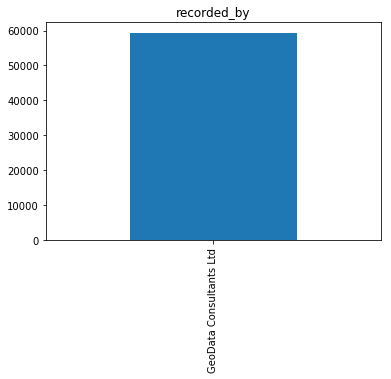

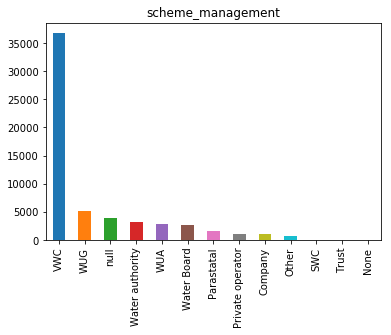

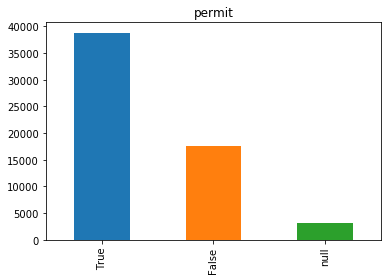

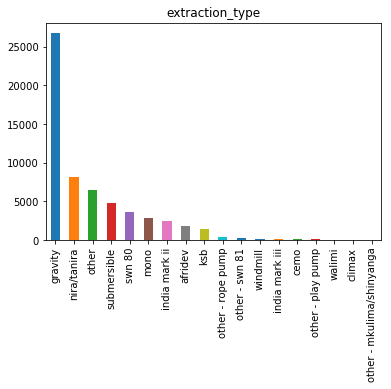

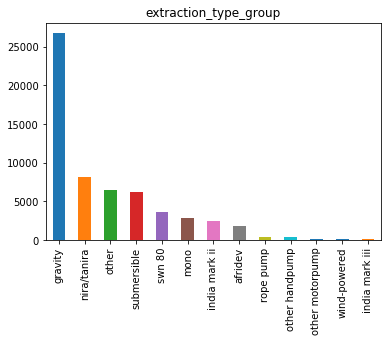

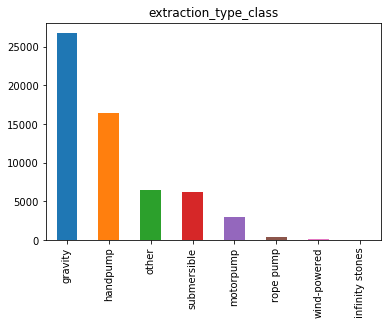

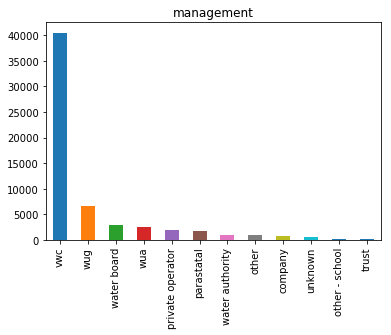

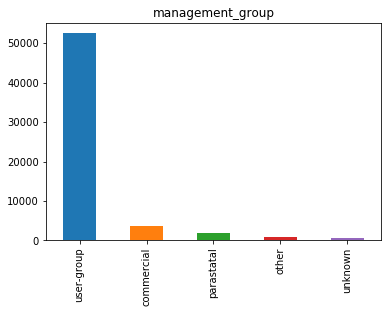

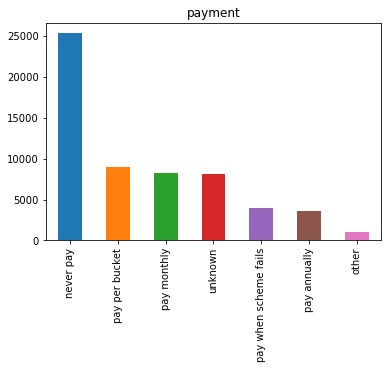

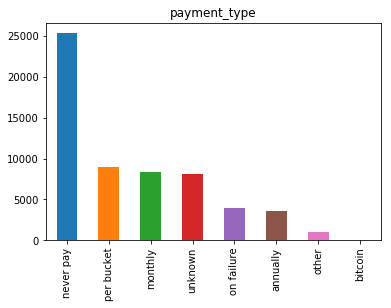

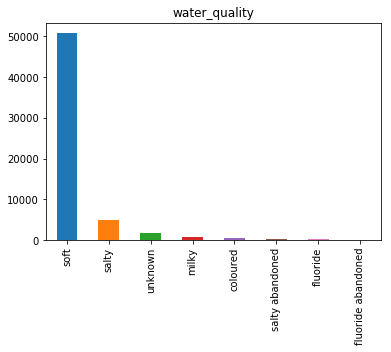

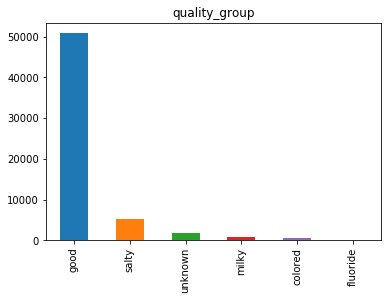

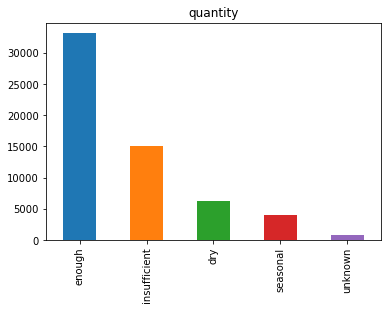

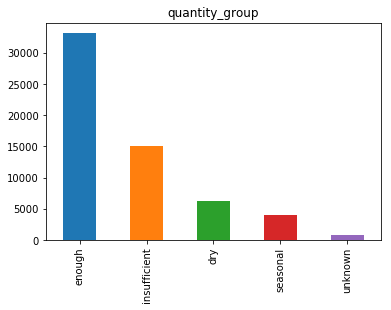

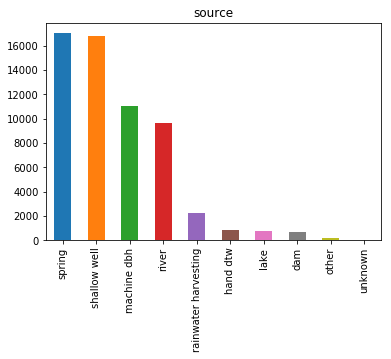

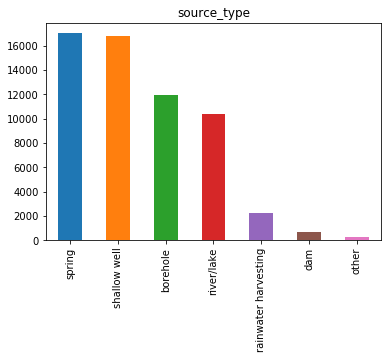

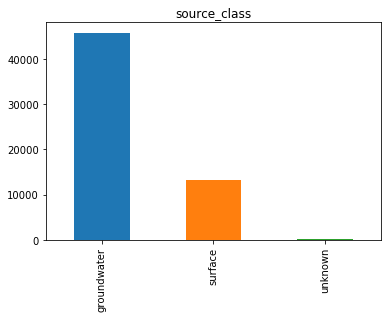

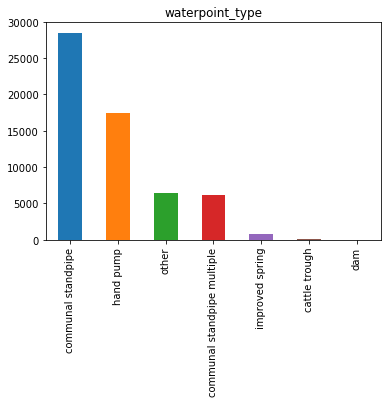

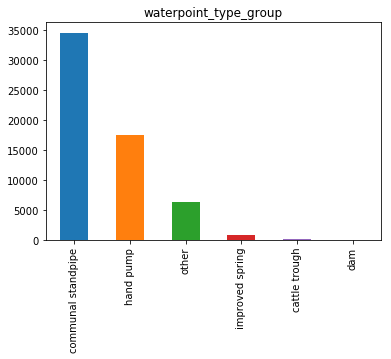

In [53]:
data_vis_categorical(data)

In [109]:
data_vis_categorical(data)

#### ******Last thing - maybe don't include 
** convert amount_tsh to numeric

#### Data Visualisation with respect to target variable (status_group)

In [49]:
def data_visualisation_target(df, target_feat):
    
    '''
    !££%adf32489741
    ******
    Visual breakdown 
    
    '''
    #Numeric
    for c in list(df.select_dtypes(include=[np.number]).keys()):
        print(c)
        df.hist(column = c, by=target_feat, figsize=(10, 4), sharey=True, sharex=True, layout = (1, 4), normed = True, bins = 20)
        plt.show()
    
    for c in list(df.select_dtypes(include=[np.object]).keys()):
        #Only if unique number of values is less than 30
        if len(df[c].unique()) < 30:
            # Calculate a max value for frequencies
            x_max = df[c].value_counts().max()

            # Create a canvas
            plt.figure(figsize=(10, 5))

            # Insert a subplot in a 2 by 2 grid at position 1
            plt.subplot(1,4, 1)

            print(c)
            
            for idx, clus in enumerate(df[target_feat].unique()):
                plt.subplot(1,4,idx + 1)
                df.loc[df[target_feat] == clus, c].value_counts(normalize=True).sort_index().plot(kind = "barh", title = "Target: " + str(clus))


            # Causes the pliots to be spaced properly so axes etc don't overlap
            plt.tight_layout()
            plt.show()

id


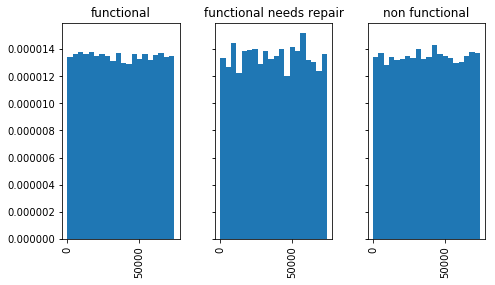

gps_height


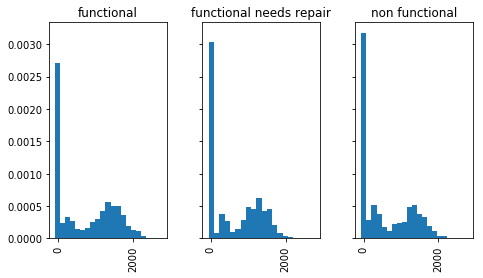

longitude


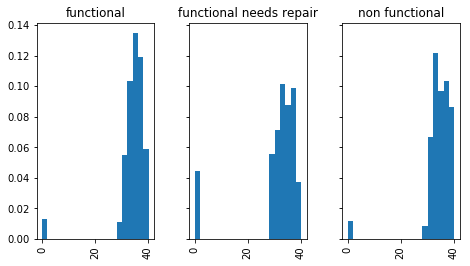

latitude


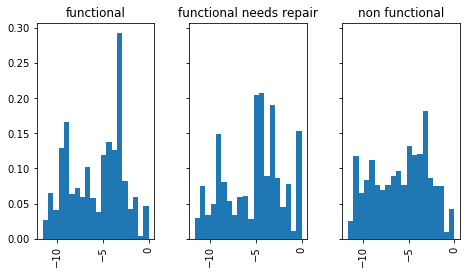

num_private


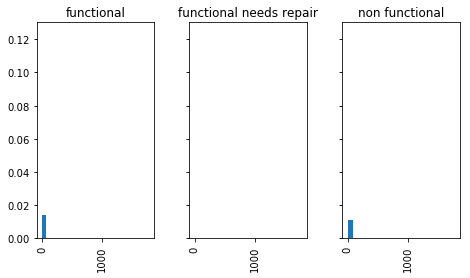

region_code


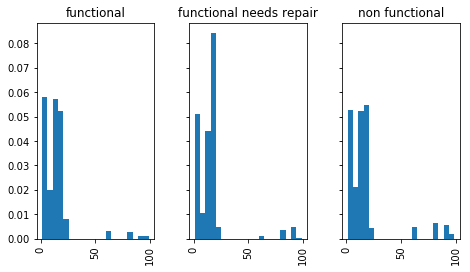

district_code


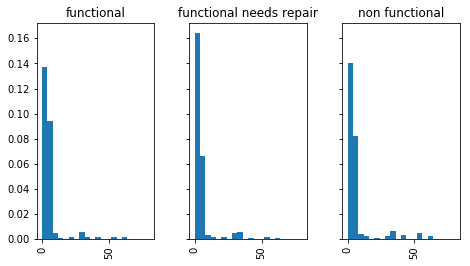

population


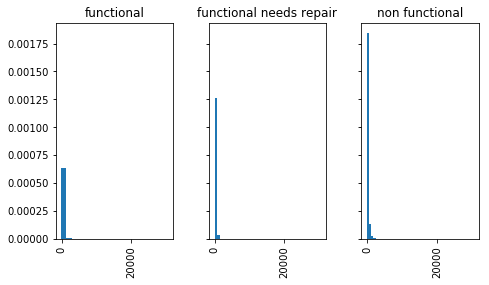

construction_year


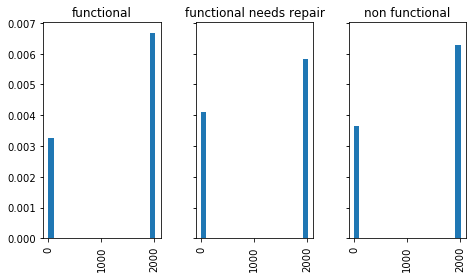

amount_tsh


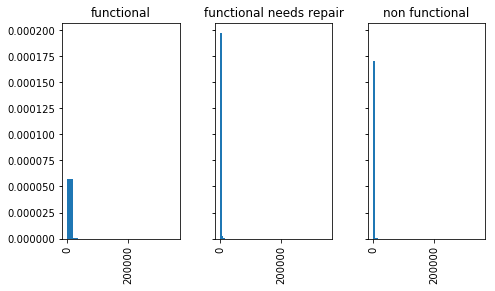

status_group


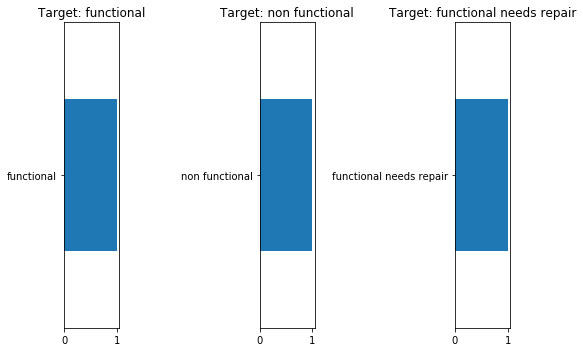

basin


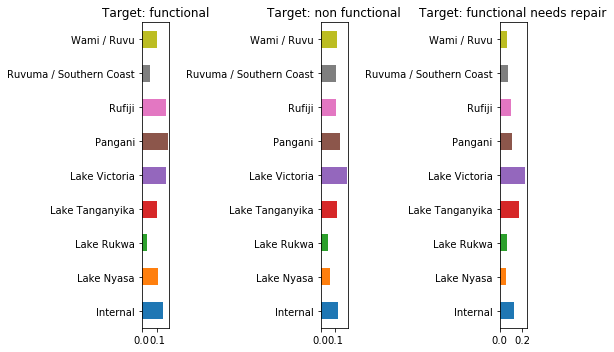

region


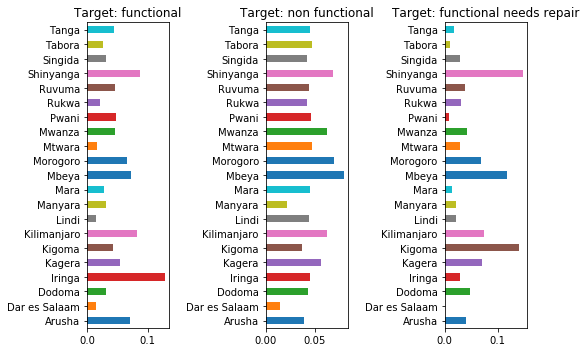

public_meeting


TypeError: unorderable types: str() < bool()

In [50]:
data_visualisation_target(data, 'status_group')

<a id='corr'></a>
#### 2.3.2 Data Correlation

In [51]:
#Correlation
correlation = data.corr()
corr_map = sns.diverging_palette(5, 250, as_cmap=True)

correlation.style.background_gradient(corr_map, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)

,id,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,amount_tsh
id,1,-0.0047,-0.0012,0.0016,-0.0026,-0.003,-0.003,-0.0028,-0.002,-0.0053
gps_height,-0.0047,1,0.15,-0.036,0.0072,-0.18,-0.17,0.14,0.66,0.077
longitude,-0.0012,0.15,1,-0.43,0.024,0.034,0.15,0.087,0.4,0.022
latitude,0.0016,-0.036,-0.43,1,0.0068,-0.22,-0.2,-0.022,-0.25,-0.053
num_private,-0.0026,0.0072,0.024,0.0068,1,-0.02,-0.0045,0.0038,0.026,0.0029
region_code,-0.003,-0.18,0.034,-0.22,-0.02,1,0.68,0.094,0.032,-0.027
district_code,-0.003,-0.17,0.15,-0.2,-0.0045,0.68,1,0.062,0.048,-0.024
population,-0.0028,0.14,0.087,-0.022,0.0038,0.094,0.062,1,0.26,0.016
construction_year,-0.002,0.66,0.4,-0.25,0.026,0.032,0.048,0.26,1,0.068
amount_tsh,-0.0053,0.077,0.022,-0.053,0.0029,-0.027,-0.024,0.016,0.068,1


#### Comment on correlations
- Most numeric features are not correlated.

- __'district_code'__ and __'region_code'__ have a __high positive correlation (0.68)__
- __'Construction_year'__ and __'gps_height'__ have a relatively __high positive correlation (0.66)__

- __'Longitude'__ and __'latitude'__ have a __medium positive correlation (-0.43)__

#### Possible solutions to correlated variables
- Correlated variables/Multicolinearity could be dealth with using the following methods;

    - __Removal of highly correlated predictors from the model:__
        Remove one of the predictors for example (gps_height and latitude)
    
    - __Principal Components Analysis__ could be used to cut the number of predictors to a smaller set of uncorrelated components
    
#### Solution
- In 'Feature Selection' 'region_code' will be removed as it is analagous/the coded version of 'region'
- If time permits the final model will be fit with
    - Both latitude and longitude included
    - Latitude only, longitude only
    - With PCA applied (combing latitude and longitude to one variable)

<a id='data_prep'></a>
# Section 3: Data Preparation 

#### 3.1.1 Data Construction - Boolean variables

In [52]:
def format_boolean_cols(data, col):
    'Format boolean values'
    
    #1. Replace null values
    print(data[col].value_counts())
    data[col].replace('null', data[col].mode().values[0], inplace=True)
    print(data[col].value_counts())
    
    #Replace True,False with 1,0
    data[col].replace(True, 1, inplace=True)
    data[col].replace(False, 0, inplace=True)
    print('*****')
    print('Final value counts:')
    print(data[col].value_counts())
    
    return data

In [53]:
#Boolean 1: public_meeting
col = 'public_meeting'
data = format_boolean_cols(data, col)

True     51009
False     5054
null      3335
Name: public_meeting, dtype: int64
True     54344
False     5054
Name: public_meeting, dtype: int64
*****
Final value counts:
1.0    54344
0.0     5054
Name: public_meeting, dtype: int64


In [54]:
#Boolean 1: public_meeting
col = 'permit'
data = format_boolean_cols(data, col)

True     38851
False    17491
null      3056
Name: permit, dtype: int64
True     41907
False    17491
Name: permit, dtype: int64
*****
Final value counts:
1.0    41907
0.0    17491
Name: permit, dtype: int64


<a id='construct_categorical'></a>
#### 3.1.2 Data Construction - Categorical Variables

In [55]:
def list_cat_cols(df):
    '''Get list of categorical columns
    '''
    list_cols = []
    for idx, col in enumerate(df.select_dtypes(include=[np.object]).keys()):
            list_cols.append(col)
    
    return list_cols

In [ ]:
#List_cols
list_cat_cols = list_cat_cols(data) #data_day1
list_cat_cols

In [57]:
def infer_category_type(data, list_cat_cols):
    '''
    Convert categorical variables from type object to category
    Parameters
    data:
    
    Returns
    data: With categorical columns as type category
    '''
    
    for column_name in list_cat_cols:
        data[column_name] = data[column_name].astype('category')
        
    return data

In [58]:
#Apply
data = infer_category_type(data, list_cat_cols)

In [59]:
#Apply
data = infer_category_type(data, list_cat_cols)
data.dtypes

status_group             category
id                        float64
date_recorded            category
funder                   category
gps_height                float64
installer                category
longitude                 float64
latitude                  float64
wpt_name                 category
num_private                 int64
basin                    category
subvillage               category
region                   category
region_code                 int64
district_code               int64
lga                      category
ward                     category
population                  int64
public_meeting            float64
recorded_by              category
scheme_management        category
scheme_name              category
permit                    float64
construction_year           int64
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment       

#### Label Encoder of Categorical variables

In [60]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        data[column_name] = preprocessing.LabelEncoder().fit_transform(data[column_name])
    
    return data

In [61]:
#List columns label encode 
list_le_cols = ['funder','installer','wpt_name','basin','subvillage','region','lga','ward','recorded_by','scheme_management','scheme_name','extraction_type','extraction_type_group','extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [62]:
#Apply
data = label_enocder(data, list_le_cols)

In [63]:
print(data.shape)
data.head()

(59398, 41)


,status_group,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh
0,functional,69572.0,3/14/11,1369,1390.0,1518,34.938093,-9.856322,37398,0,...,6,2,1,1,8,6,0,1,1,6000.0
1,functional,8776.0,3/6/13,469,1399.0,545,34.698766,-2.147466,37194,0,...,6,2,2,2,5,3,1,1,1,0.0
2,functional,34310.0,2/25/13,825,686.0,2048,37.460664,-3.821329,14571,0,...,6,2,1,1,0,1,1,2,1,25.0
3,non functional,67743.0,1/28/13,1741,263.0,1852,38.486161,-11.155298,37284,0,...,6,2,0,0,3,0,0,2,1,0.0
4,functional,19728.0,7/13/11,20,0.0,119,31.130847,-1.825359,35528,0,...,6,2,3,3,5,3,1,1,1,0.0


### 3.2 Feature Selection
To reduce the complexity of the model (reduce overfitting) some of the predictors were removed;

 __region_code__ was removed as;
- It is merely the coded version of __region__
- It is higly correlated with __district_code__ and so to avoid multi-collinearity one of the predictors should be removed. Given the first point above, of the two, it was decided to remove  __region_code__


In [69]:
#Fake 
print(data.shape)
columns_drop = ['region_code']
data = data.drop(columns_drop, axis=1)
print(data.shape)

(59398, 41)
(59398, 40)


<a id='final_dataset'></a>
### 3.3 Final Dataset

- The final dataset is shown below

In [90]:
data.head()

,status_group,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh
0,functional,69572.0,3/14/11,1369,1390.0,1518,34.938093,-9.856322,37398,0,...,6,2,1,1,8,6,0,1,1,6000.0
1,functional,8776.0,3/6/13,469,1399.0,545,34.698766,-2.147466,37194,0,...,6,2,2,2,5,3,1,1,1,0.0
2,functional,34310.0,2/25/13,825,686.0,2048,37.460664,-3.821329,14571,0,...,6,2,1,1,0,1,1,2,1,25.0
3,non functional,67743.0,1/28/13,1741,263.0,1852,38.486161,-11.155298,37284,0,...,6,2,0,0,3,0,0,2,1,0.0
4,functional,19728.0,7/13/11,20,0.0,119,31.130847,-1.825359,35528,0,...,6,2,3,3,5,3,1,1,1,0.0


In [91]:
print(data.shape)

(59398, 40)


In [108]:
print(data.shape)

(59398, 40)


#### Save so can upload to h20

In [109]:
data.to_csv('final_data_day2.csv')

In [117]:
folder = '/mapr/users/hcraddoc/evaluation_feb2019/'
file = 'final_data_day2.csv'
data.to_csv(folder + file)

#### Class balance

In [64]:
data["status_group"].value_counts()

functional                 32259
non functional             22823
functional needs repair     4316
Name: status_group, dtype: int64

#### Features, Target_Variable
- (split into the features (X) and the target variable (y) are shown below)

In [70]:
X = data.drop(['status_group', 'id','date_recorded'], axis=1)# X = data.drop('date_recorded', axis=1) 
print(X.shape)

(59398, 37)


In [71]:
X.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh
0,1369,1390.0,1518,34.938093,-9.856322,37398,0,1,11807,3,...,6,2,1,1,8,6,0,1,1,6000.0
1,469,1399.0,545,34.698766,-2.147466,37194,0,4,15837,9,...,6,2,2,2,5,3,1,1,1,0.0
2,825,686.0,2048,37.460664,-3.821329,14571,0,5,9074,8,...,6,2,1,1,0,1,1,2,1,25.0
3,1741,263.0,1852,38.486161,-11.155298,37284,0,7,8982,12,...,6,2,0,0,3,0,0,2,1,0.0
4,20,0.0,119,31.130847,-1.825359,35528,0,4,7698,4,...,6,2,3,3,5,3,1,1,1,0.0


In [68]:
X.columns

Index(['funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'amount_tsh'],
      dtype='object')

In [66]:
y = data["status_group"]
y.shape

(59398,)

<a id='model_build'></a>
# Section 4: Model Building 

- __4.1 Test Design__
- __4.2 Selection of Model type__
- __4.3 Hyper parameter tuning__
- __4.4 Test final model on test set__

### 4.1 Test Design
- Split data into train, validation and test sets;


- __Training set__: Fit model to training set

    
- __Validation set__: Use the validation set to select the select best performing model (hyper-parameters tuning etc)


- __Test set__: Use test set to get an unbiased evaluation of the final model fit

In [72]:
#Set sizes
train_sizeX = 0.5
test_sizeX = 0.3
valid_sizeX = round((1.0 - (train_sizeX + test_sizeX)), 3)
#Combine train + valid
train_valid_size = train_sizeX + valid_sizeX
print('Training size = {}'.format(train_sizeX))
print('Validation size = {}'.format(valid_sizeX)) 
print('Test size = {}'.format(test_sizeX))

Training size = 0.5
Validation size = 0.2
Test size = 0.3


In [73]:
#Split Data
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, y, random_state=0, \
                                    train_size = train_sizeX + valid_sizeX)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = train_sizeX/train_valid_size)

/app/anaconda3/envs/python352/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [96]:
#Print shapes
#X shapes
print("X shape = {},".format(X.shape))
print("X train shape = {},".format(X_train.shape))
print("X valid shape = {}".format(X_valid.shape))
print("X test shape = {}".format(X_test.shape))
print('*****')
print("y shape = {},".format(y.shape))
print("y train shape = {},".format(y_train.shape))
print("y valid shape = {}".format(y_valid.shape))
print("y test shape = {}".format(y_test.shape))

X shape = (59398, 37),
X train shape = (29698, 37),
X valid shape = (11880, 37)
X test shape = (17820, 37)
*****
y shape = (59398,),
y train shape = (29698,),
y valid shape = (11880,)
y test shape = (17820,)


### 4.2 Selection of Model Type

__Modelling technique: Ensemble Methods only__

- Only ensemble methods were tested given that they are the aggregate of multiple learning algorithms and therefore generally obtain a better predictive performance than could be obtained from any of the constituent learning algorithms alone

- Random Forest, Gradient Boosting, XGBoost were tested

__Approach Comparing models__:

- Models will be fit on the training set
- Predictions will be made on the validation set 
- Models will be compared using the accuracy given by the mean of the cross-validation models
- When comparing models the __default hyper-parameter settings__ will be used
- Once the final model is chosen then parameter tuning will be performed


__Function: to test model on validation data and using cross validation__

In [127]:
def model_performace_val_cv(model, X, y, X_valid, y_valid):
    '''
    Compute accuracy on validation set and using cross-validation
    
    Parameters:
    model, X, y, X_valid, y_valid

    
    '''
    print('Model = {}'.format(model))
    
    #1. Test on validation set
    
    #Predictions for the test data
    y_pred = model.predict(X_valid)
    
    #Validation accuracy
    validation_accuracy = metrics.accuracy_score(y_valid, y_pred)
    print("Validation Accuracy: " + str(validation_accuracy))
    
    #2. Cross validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross Validation (CV) accuracies: {}".format(cv_scores)) 
    print("Mean CV accuracy: {}".format(cv_scores.mean())) 
    print("Std CV accuracy: {}".format(cv_scores.std()))

In [128]:
print(model_performace_val_cv.__doc__)


    Compute accuracy on validation set and using cross-validation
    
    Parameters:
    model, X, y, X_valid, y_valid

    
    


### 4.2.1 Random Forest

- First implement a Random Forest Classifier
- Default setting will be used for first iteration when models are being compared

In [103]:
#Model
random_forest_classifier = RandomForestClassifier()
#Fit to data
random_forest_classifier.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(random_forest_classifier, X, y, X_valid, y_valid)

/app/anaconda3/envs/python352/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Validation Accuracy: 0.790909090909
Cross Validation (CV) accuracies: [ 0.80313105  0.79747475  0.80176768  0.79636333  0.79718808]
Mean CV accuracy: 0.799184976573035
Std CV accuracy: 0.0027245551821553503


### 4.2.2 Gradient Boosting Model

- Implement a Gradient Boosting Classifier
- Default setting will be used for first iteration when models are being compared

In [77]:
#Model
gradient_boosting_classifer = GradientBoostingClassifier()
#Fit to data
gradient_boosting_classifer.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(gradient_boosting_classifer, X, y, X_valid, y_valid)

Model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Validation Accuracy: 0.756734006734
Cross Validation (CV) accuracies: [ 0.75195691  0.75117845  0.74814815  0.74913713  0.75879778]
Mean CV accuracy: 0.751843683093966
Std CV accuracy: 0.0037362326978721354


### 4.2.3 XGboost

- Implement XGBoost model
- Default setting will be used for first iteration when models are being compared

In [131]:
#Model
xgboost_classifer = XGBClassifier()
#Fit to data
xgboost_classifer.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(xgboost_classifer, X, y, X_valid, y_valid)

Model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Validation Accuracy: 0.750757575758
Cross Validation (CV) accuracies: [ 0.79698679  0.79587542  0.80109428  0.79897298  0.799377  ]
Mean CV accuracy: 0.7984612919224054
Std CV accuracy: 0.0018381428702450488


## Model Selection: Random Forest

- It was decided to implement a Random Forest as the final model given that its validation accuracy was __79.1%__ compared to __75.2%__ for the gradient boosted model and __75.1%__ for the xgboost model 

### 4.3 Model Selection - Hyperparameter tuning

- Now tune the random forest to find the best features

__RandomForestClassifier()__

n_estimators : The number of trees in the forest.

criterion : The function to measure the quality of a split (default=”gini”)

max_depth : The maximum depth of the tree

#### Hyper-parameter search grid

In [17]:
#Grid Search
param_grid = {'criterion': ['gini', "entropy"],\
             'n_estimators': list(range(100, 500, 100)),\ #100, 200, 300, 400
             'max_depth': list(range(3, 20, 5)),\ #3, 8, 13, 18
             }

#### Best performing hyper-parameters

In [18]:
# Use Grid Search to determine best performing hyper-parameters
tuned_random_forest = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5)
tuned_random_forest.fit(X_train, y) #Should have been y_train 

Best parameters set found on development set:
{'n_estimators': 300, 'criterion': 'entropy', 'max_depth': 18}
0.875857142857


- Note: Default parameters: n_estimators: 10, criterion:gini, max_depth:None

#### Final Model

In [88]:
final_model = RandomForestClassifier(n_estimators=300, criterion= 'entropy', max_depth=18)
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 4.4 Test final model on test set

#### 4.4.1 Predictions

In [89]:
# Make a set of predictions for the test data
y_pred = final_model.predict(X_test)

#### 4.4.2 Confusion matrix

In [99]:
print("Confusion Matrix:")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,functional,functional needs repair,non functional,All
True,,,,
functional,8910,144,664,9718
functional needs repair,773,360,157,1290
non functional,1732,69,5011,6812
All,11415,573,5832,17820


#### 4.4.2 Performance metrics

In [130]:
def performance_final_model(y_pred, y_test, final_model):
    '''
    Display performance of final model inc;
    - Accuracy
    - Classification report
    
    '''
    
    #Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred) 
    print('\n')
    print("Accuracy: " +  str(accuracy))
    
    #Classification report
    print('\n')
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))

In [131]:
print(performance_final_model.__doc__)


    Display performance of final model inc;
    - Accuracy
    - Classification report
    
    


In [103]:
performance_final_model(y_pred, y_test, final_model)



Accuracy: 0.80140291807


Classification Report:
                         precision    recall  f1-score   support

             functional       0.78      0.92      0.84      9718
functional needs repair       0.63      0.28      0.39      1290
         non functional       0.86      0.74      0.79      6812

              micro avg       0.80      0.80      0.80     17820
              macro avg       0.76      0.64      0.67     17820
           weighted avg       0.80      0.80      0.79     17820



### 4.4.4 Feature Importance

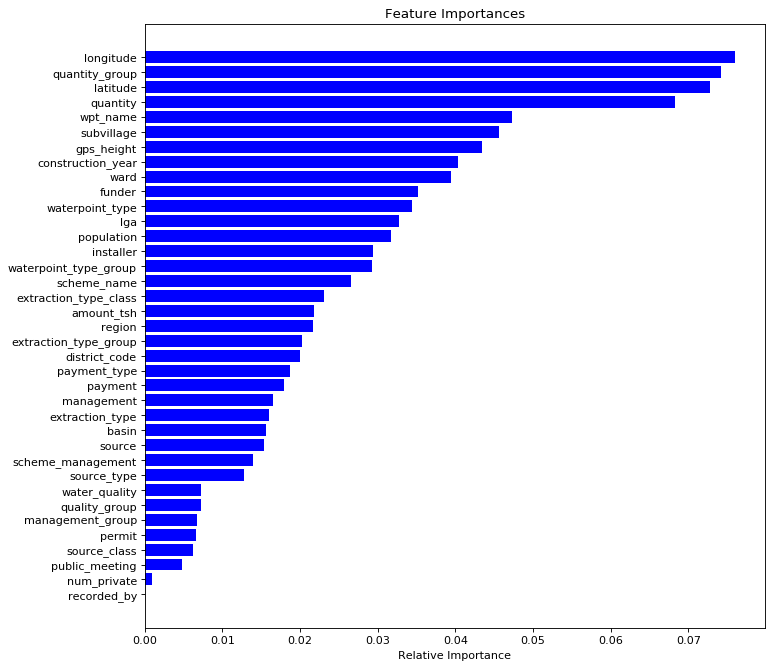

In [124]:
#Feature Importance
importances = final_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

#Plot
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

__Feature Importance__
- Lognitude most important feature followed by quantity group and latitude
- recorded_by and num_private least important features

### Final Model: Accuracy of final model on test set = 80.14%

<a id='eval'></a>
# Section 5: Evaluation 

### 5.1 Conclusion

- Predicted the status of the water pumps using data from Taarifa and the Tanzanian by creating a predictive model


   - __Final model: Random Forest model with an accuracy on the test set of 80.14%__
    
    
- Achieved this using the CRISP-DM framework with the following stages;
  - Business Understanding
  - Data Understanding
  - Data Preparation
  - Model Building
  - Evaluation

### References

- CRISP-DM: https://www.sv-europe.com/crisp-dm-methodology/#evaluation

#### Task 8: Given more time
- PCA could have been attempted
- More thorough Feature selection
- Completion of all doc strings for the functions